In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

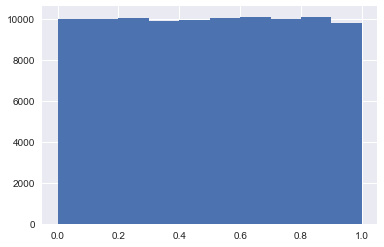

In [2]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()

You can think of a Bernoulli trial as a flip of a possibly biased coin. Specifically, each coin flip has a probability p of landing heads (success) and probability 1−p of landing tails (failure). In this exercise, you will write a function to perform n Bernoulli trials, perform_bernoulli_trials(n, p), which returns the number of successes out of n Bernoulli trials, each of which has probability p of success. To perform each Bernoulli trial, use the np.random.random() function, which returns a random number between zero and one.

In [3]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success  so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

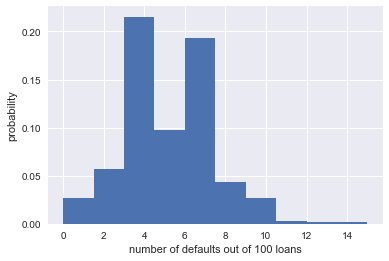

In [4]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)

# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, normed=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

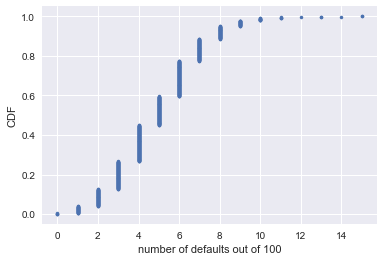

Probability of losing money = 0.022


In [5]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with labeled axes
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('number of defaults out of 100')
_ = plt.ylabel('CDF')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

Биномиальное распределение

In [15]:
#четрые подбрасывания монетки с веростноятностью 0,5 дают два орла

np.random.binomial(4, 0.5)

2

In [39]:
np.random.binomial(60, 0.1, size=10)

array([ 4, 10,  7,  8,  8,  7,  6,  7,  4,  5])

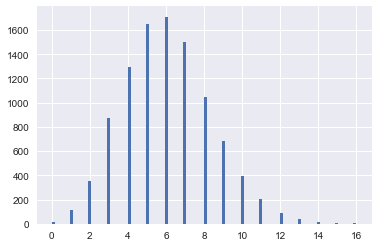

In [31]:
samples = np.random.binomial(60, 0.1, size=10000)
plt.hist(samples, bins=100)
plt.show()

Compute the probability mass function for the number of defaults we would expect for 100 loans as in the last section, but instead of simulating all of the Bernoulli trials, perform the sampling using np.random.binomial(). This is identical to the calculation you did in the last set of exercises using your custom-written perform_bernoulli_trials() function, but far more computationally efficient. Given this extra efficiency, we will take 10,000 samples instead of 1000. After taking the samples, plot the CDF as last time. This CDF that you are plotting is that of the Binomial distribution.

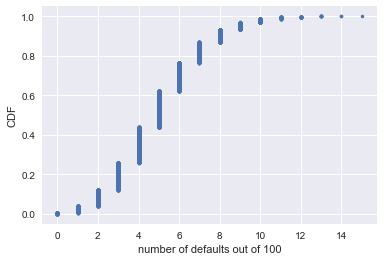

In [40]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(100, 0.05, size = 10000)

# Compute CDF: x, y
x,y = ecdf(n_defaults)

# Plot the CDF with axis labels
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('number of defaults out of 100')
_ = plt.ylabel('CDF')

# Show the plot
plt.show()

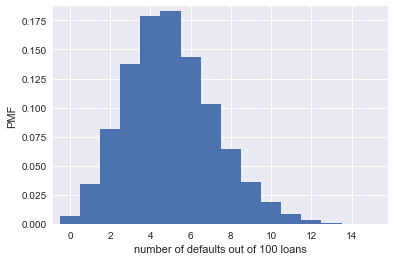

In [41]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
_ = plt.hist(n_defaults, normed=True, bins=bins)

# Set margins
plt.margins(0.02)

# Label axes
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('PMF')

# Show the plot
plt.show()


Распределение Пуассона

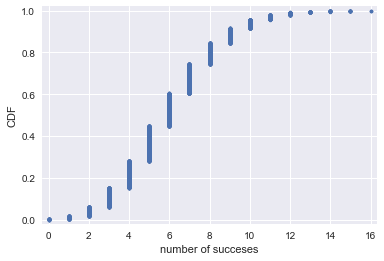

In [42]:
samples = np.random.poisson(6, size=10000)
x,y = ecdf(samples)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('number of succeses')
plt.ylabel('CDF')
plt.show()

### Relationship between Binomial and Poisson distributions

You just heard that the Poisson distribution is a limit of the Binomial distribution for rare events. This makes sense if you think about the stories. Say we do a Bernoulli trial every minute for an hour, each with a success probability of 0.1. We would do 60 trials, and the number of successes is Binomially distributed, and we would expect to get about 6 successes. This is just like the Poisson story we discussed in the video, where we get on average 6 hits on a website per hour. So, the Poisson distribution with arrival rate equal to np approximates a Binomial distribution for n Bernoulli trials with probability p of success (with n large and p small). Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.

Let's explore these two distributions computationally. You will compute the mean and standard deviation of samples from a Poisson distribution with an arrival rate of 10. Then, you will compute the mean and standard deviation of samples from a Binomial distribution with parameters n and p such that np=10.

In [43]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, size=10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))

Poisson:      9.9953 3.17015424073
n = 20 Binom: 9.9716 2.23158989064
n = 100 Binom: 10.0057 3.01218649987
n = 1000 Binom: 10.0146 3.14671047921


In [44]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, size=10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = n_large / 10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)

Probability of seven or more no-hitters: 0.0065


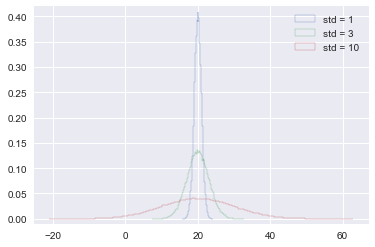

In [45]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

# Make histograms
_ = plt.hist(samples_std1, bins=100, normed=True, histtype='step')
_ = plt.hist(samples_std3, bins=100, normed=True, histtype='step')
_ = plt.hist(samples_std10, bins=100, normed=True, histtype='step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

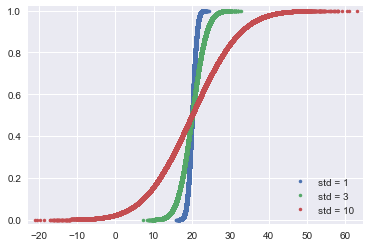

In [46]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
_ = plt.plot(x_std1, y_std1, marker='.', linestyle='none')
_ = plt.plot(x_std3, y_std3, marker='.', linestyle='none')
_ = plt.plot(x_std10, y_std10, marker='.', linestyle='none')

# Make 2% margin
plt.margins(0.02)

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

In [52]:
belmont_no_outliers = np.array([ 148.51,  146.65,  148.52,  150.7 ,  150.42,  150.88,  151.57,
        147.54,  149.65,  148.74,  147.86,  148.75,  147.5 ,  148.26,
        149.71,  146.56,  151.19,  147.88,  149.16,  148.82,  148.96,
        152.02,  146.82,  149.97,  146.13,  148.1 ,  147.2 ,  146.  ,
        146.4 ,  148.2 ,  149.8 ,  147.  ,  147.2 ,  147.8 ,  148.2 ,
        149.  ,  149.8 ,  148.6 ,  146.8 ,  149.6 ,  149.  ,  148.2 ,
        149.2 ,  148.  ,  150.4 ,  148.8 ,  147.2 ,  148.8 ,  149.6 ,
        148.4 ,  148.4 ,  150.2 ,  148.8 ,  149.2 ,  149.2 ,  148.4 ,
        150.2 ,  146.6 ,  149.8 ,  149.  ,  150.8 ,  148.6 ,  150.2 ,
        149.  ,  148.6 ,  150.2 ,  148.2 ,  149.4 ,  150.8 ,  150.2 ,
        152.2 ,  148.2 ,  149.2 ,  151.  ,  149.6 ,  149.6 ,  149.4 ,
        148.6 ,  150.  ,  150.6 ,  149.2 ,  152.6 ,  152.8 ,  149.6 ,
        151.6 ,  152.8 ,  153.2 ,  152.4 ,  152.2 ])

Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. Secretariat ran the fastest Belmont Stakes in history in 1973. While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. With these two outliers removed from the data set, compute the mean and standard deviation of the Belmont winners' times. Sample out of a Normal distribution with this mean and standard deviation using the np.random.normal() function and plot a CDF. Overlay the ECDF from the winning Belmont times. Are these close to Normally distributed?

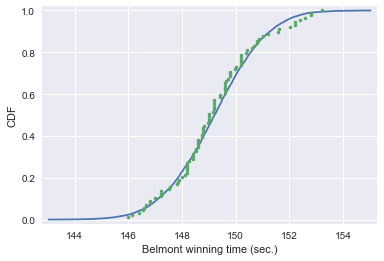

In [53]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()


#### What are the chances of a horse matching or beating Secretariat's record?
Assume that the Belmont winners' times are Normally distributed (with the 1970 and 1973 years removed), what is the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?

In [54]:
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, size=1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples <= 144) / len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.000609


#### Exponentian distribution

In [55]:
def successive_poisson(tau1, tau2, size=1):
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size=size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size=size)

    return t1 + t2

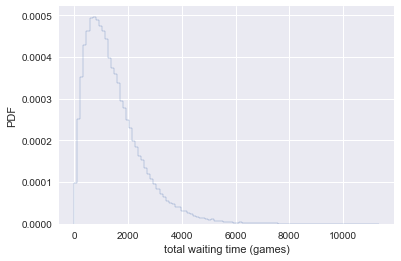

In [56]:
# Draw samples of waiting times
waiting_times = successive_poisson(764, 715, size=100000)

# Make the histogram
_ = plt.hist(waiting_times, bins=100, histtype='step',
             normed=True)

# Label axes
_ = plt.xlabel('total waiting time (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [9]:
nohitter_times = np.array([ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
        876,  381,  905,  156,  419,  239,  119,  129,  467])

#### How often do we get no-hitters?
The number of games played between each no-hitter in the modern era (1901-2015) of Major League Baseball is stored in the array nohitter_times.

If you assume that no-hitters are described as a Poisson process, then the time between no-hitters is Exponentially distributed. As you have seen, the Exponential distribution has a single parameter, which we will call \tau, the typical interval time. The value of the parameter τ that makes the exponential distribution best match the data is the mean interval time (where time is in units of number of games) between no-hitters.

Compute the value of this parameter from the data. Then, use np.random.exponential() to "repeat" the history of Major League Baseball by drawing inter-no-hitter times from an exponential distribution with the τ you found and plot the histogram as an approximation to the PDF.

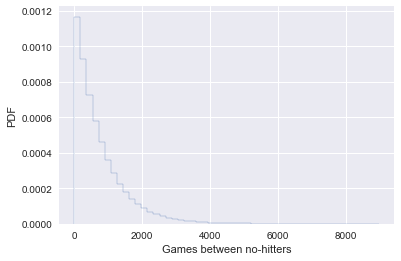

In [10]:
# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             bins=50, normed=True, histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

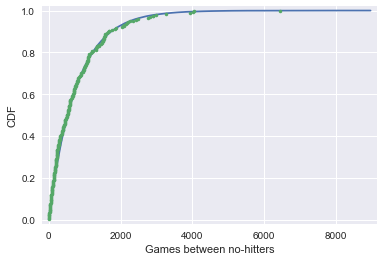

In [11]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()

#### How is this parameter optimal?

Now sample out of an exponential distribution with τ being twice as large as the optimal τ. Do it again for τ half as large. Make CDFs of these samples and overlay them with your data. You can see that they do not reproduce the data as well. Thus, the τ you computed from the mean inter-no-hitter times is optimal in that it best reproduces the data.

Note: In this and all subsequent exercises, the random number generator is pre-seeded for you to save you some typing.

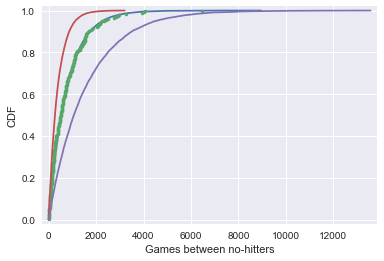

In [12]:
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2, 10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(2*tau, 10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()

#### Линейная регрессия

slope, intercept = np.polyfit(x, y, степень многочлена)

That is, f=ai+b, where a is the slope and b is the intercept. 

In [6]:
df_swing = pd.read_csv('./data/2008_swing_states.csv')
total_votes = df_swing.total_votes
dem_share = df_swing.dem_share

slope, intercept = np.polyfit(total_votes, dem_share, 1)
print(slope, intercept)

4.03707170095e-05 40.1139119686


линейная функция - полином 1й степени
1 - степень мгногочлена

slope: мы получаем на 4% больше голосов за демократов за каждые 100 000 голосующих

- slope - наклон
- intercept - пересечение линейной регрессии оси Y
- residual - отклонение точки от линии регрессии

In [17]:
df_illit = pd.read_csv('./data/literacy_birth_rate.csv')
literacy = df_illit['female literacy']
fertility = df_illit.fertility
literacy2 = pd.to_numeric(literacy, errors='coerce').dropna()[:162]
illiteracy = 100 - literacy2
fertility = pd.to_numeric(fertility, errors='coerce').dropna()[:162]

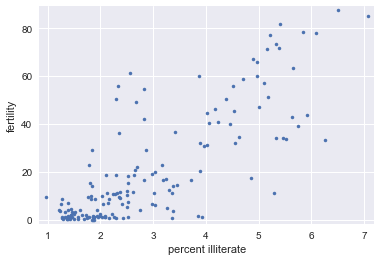

In [18]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(fertility, illiteracy, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

In [42]:
np.corrcoef(illiteracy, fertility)

array([[ 1.       ,  0.8041324],
       [ 0.8041324,  1.       ]])

slope = 0.0497985480906 children per woman / percent illiterate
intercept = 1.88805061064 children per woman


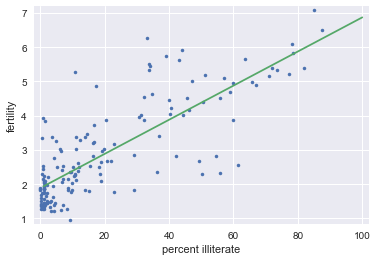

In [43]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility, 1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([1,100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()

The function np.polyfit() that you used to get your regression parameters finds the optimal slope and intercept. It is optimizing the sum of the squares of the residuals, also known as RSS (for residual sum of squares). In this exercise, you will plot the function that is being optimized, the RSS, versus the slope parameter a. To do this, fix the intercept to be what you found in the optimization. Then, plot the RSS vs. the slope. Where is it minimal?

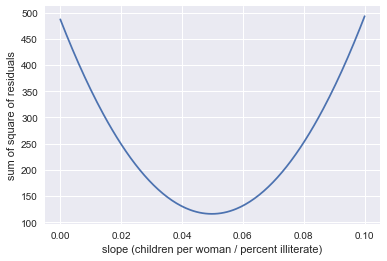

In [45]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, 200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a*illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()

resampling array: np.randoim.choice()

In [47]:
np.random.choice([1,2,3,4,5], size=5)

array([1, 2, 3, 4, 4])

In [9]:
rainfall = np.array([  875.5,   648.2,   788.1,   940.3,   491.1,   743.5,   730.1,
         686.5,   878.8,   865.6,   654.9,   831.5,   798.1,   681.8,
         743.8,   689.1,   752.1,   837.2,   710.6,   749.2,   967.1,
         701.2,   619. ,   747.6,   803.4,   645.6,   804.1,   787.4,
         646.8,   997.1,   774. ,   734.5,   835. ,   840.7,   659.6,
         828.3,   909.7,   856.9,   578.3,   904.2,   883.9,   740.1,
         773.9,   741.4,   866.8,   871.1,   712.5,   919.2,   927.9,
         809.4,   633.8,   626.8,   871.3,   774.3,   898.8,   789.6,
         936.3,   765.4,   882.1,   681.1,   661.3,   847.9,   683.9,
         985.7,   771.1,   736.6,   713.2,   774.5,   937.7,   694.5,
         598.2,   983.8,   700.2,   901.3,   733.5,   964.4,   609.3,
        1035.2,   718. ,   688.6,   736.8,   643.3,  1038.5,   969. ,
         802.7,   876.6,   944.7,   786.6,   770.4,   808.6,   761.3,
         774.2,   559.3,   674.2,   883.6,   823.9,   960.4,   877.8,
         940.6,   831.8,   906.2,   866.5,   674.1,   998.1,   789.3,
         915. ,   737.1,   763. ,   666.7,   824.5,   913.8,   905.1,
         667.8,   747.4,   784.7,   925.4,   880.2,  1086.9,   764.4,
        1050.1,   595.2,   855.2,   726.9,   785.2,   948.8,   970.6,
         896. ,   618.4,   572.4,  1146.4,   728.2,   864.2,   793. ])


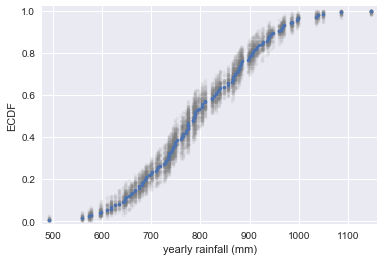

In [49]:
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, '.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

In [51]:
def bootstrap_replicate_1d(data, func):
    '''Generate bootstrape replicates of 1d data'''
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [55]:
for _ in range(10):
    print(bootstrap_replicate_1d(rainfall, np.mean))

792.542857143
814.179699248
797.286466165
825.97593985
790.572932331
783.806766917
822.160902256
811.678947368
798.641353383
807.581203008


In [58]:
rain_replicated = np.empty(10000)
for i in range(10000):
    rain_replicated[i] = bootstrap_replicate_1d(rainfall, np.mean)
print(rainfall.mean())
print(rain_replicated.mean())

800.091729323
800.07676218


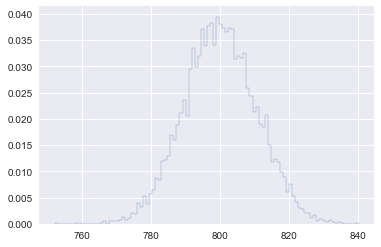

In [68]:
plt.hist(rain_replicated, bins=100, histtype='step', normed=True)
plt.show()

Confedence interval - итнервал уверенности, 95%

In [69]:
conf_int = np.percentile(rain_replicated, [2.5, 97.5])
conf_int

array([ 779.70892857,  820.75236842])

In [70]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

#### Bootstrap replicates of the mean and the SEM
In this exercise, you will compute a bootstrap estimate of the probability distribution function of the mean annual rainfall at the Sheffield Weather Station. Remember, we are estimating the mean annual rainfall we would get if the Sheffield Weather Station could repeat all of the measurements from 1883 to 2015 over and over again. This is a probabilistic estimate of the mean. You will plot the PDF as a histogram, and you will see that it is Normal.

In fact, it can be shown theoretically that under not-too-restrictive conditions, the value of the mean will always be Normally distributed. (This does not hold in general, just for the mean and a few other statistics.) The standard deviation of this distribution, called the standard error of the mean, or SEM, is given by the standard deviation of the data divided by the square root of the number of data points. I.e., for a data set, sem = np.std(data) / np.sqrt(len(data)). Using hacker statistics, you get this same result without the need to derive it, but you will verify this result from your bootstrap replicates.

10.5105491505
10.6130835437


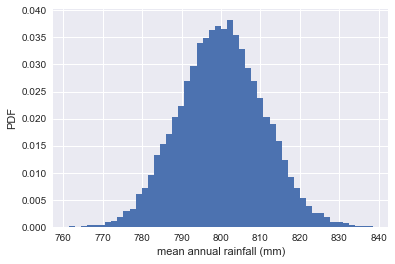

In [71]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, size=10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

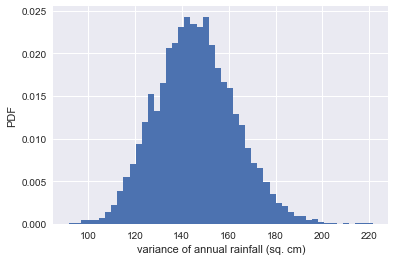

In [72]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, size=10000)

# Put the variance in units of square centimeters
bs_replicates /= 100

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


#### A function to do pairs bootstrap
As discussed in the video, pairs bootstrap involves resampling pairs of data. Each collection of pairs fit with a line, in this case using np.polyfit(). We do this again and again, getting bootstrap replicates of the parameter values. To have a useful tool for doing pairs bootstrap, you will write a function to perform pairs bootstrap on a set of x,y data.

In [73]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps


[ 0.04438875  0.05578471]


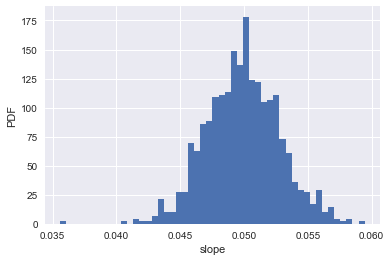

In [74]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(
                    illiteracy, fertility, size=1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

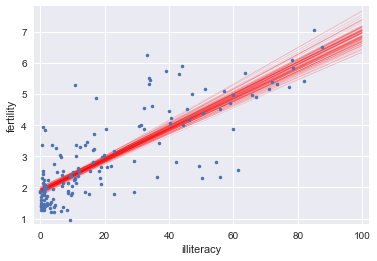

In [75]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0, 100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, bs_slope_reps[i] * x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

#### Hypothesys testing

In [5]:
df_swing = pd.read_csv('./data/2008_swing_states.csv')
#df_swing.head()
df_swing.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


In [6]:
pa = df_swing[df_swing.state == 'PA'].dem_share
oh = df_swing[df_swing.state == 'OH'].dem_share
fl = df_swing[df_swing.state == 'FL'].dem_share

In [7]:
dem_share_both = np.concatenate((pa, oh))
dem_share_perm = np.random.permutation(dem_share_both)

perm_sample_PA = dem_share_perm[:len(pa)]
perm_sample_OH = dem_share_perm[len(pa):]

In [8]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [10]:
rain_july=np.array([  66.2,   39.7,   76.4,   26.5,   11.2,   61.8,    6.1,   48.4,
         89.2,  104. ,   34. ,   60.6,   57.1,   79.1,   90.9,   32.3,
         63.8,   78.2,   27.5,   43.4,   30.1,   17.3,   77.5,   44.9,
         92.2,   39.6,   79.4,   66.1,   53.5,   98.5,   20.8,   55.5,
         39.6,   56. ,   65.1,   14.8,   13.2,   88.1,    8.4,   32.1,
         19.6,   40.4,    2.2,   77.5,  105.4,   77.2,   38. ,   27.1,
        111.8,   17.2,   26.7,   23.3,   77.2,   87.2,   27.7,   50.6,
         60.3,   15.1,    6. ,   29.4,   39.3,   56.3,   80.4,   85.3,
         68.4,   72.5,   13.3,   28.4,   14.7,   37.4,   49.5,   57.2,
         85.9,   82.1,   31.8,  126.6,   30.7,   41.4,   33.9,   13.5,
         99.1,   70.2,   91.8,   61.3,   13.7,   54.9,   62.5,   24.2,
         69.4,   83.1,   44. ,   48.5,   11.9,   16.6,   66.4,   90. ,
         34.9,  132.8,   33.4,  225. ,    7.6,   40.9,   76.5,   48. ,
        140. ,   55.9,   54.1,   46.4,   68.6,   52.2,  108.3,   14.6,
         11.3,   29.8,  130.9,  152.4,   61. ,   46.6,   43.9,   30.9,
        111.1,   68.5,   42.2,    9.8,  285.6,   56.7,  168.2,   41.2,
         47.8,  166.6,   37.8,   45.4,   43.2])

In [11]:
rain_november = np.array([  83.6,   30.9,   62.2,   37. ,   41. ,  160.2,   18.2,  122.4,
         71.3,   44.2,   49.1,   37.6,  114.5,   28.8,   82.5,   71.9,
         50.7,   67.7,  112. ,   63.6,   42.8,   57.2,   99.1,   86.4,
         84.4,   38.1,   17.7,  102.2,  101.3,   58. ,   82. ,  101.4,
         81.4,  100.1,   54.6,   39.6,   57.5,   29.2,   48.8,   37.3,
        115.4,   55.6,   62. ,   95. ,   84.2,  118.1,  153.2,   83.4,
        104.7,   59. ,   46.4,   50. ,  147.6,   76.8,   59.9,  101.8,
        136.6,  173. ,   92.5,   37. ,   59.8,  142.1,    9.9,  158.2,
         72.6,   28. ,  112.9,  119.3,  199.2,   50.7,   44. ,  170.7,
         67.2,   21.4,   61.3,   15.6,  106. ,  116.2,   42.3,   38.5,
        132.5,   40.8,  147.5,   93.9,   71.4,   87.3,  163.7,  141.4,
         62.6,   84.9,   28.8,  121.1,   28.6,   32.4,  112. ,   50. ,
         96.9,   81.8,   70.4,  117.5,   41.2,  124.9,   78.2,   93. ,
         53.5,   50.5,   42.6,   47.9,   73.1,  129.1,   56.9,  103.3,
         60.5,  134.3,   93.1,   49.5,   48.2,  167.9,   27. ,  111.1,
         55.4,   36.2,   57.4,   66.8,   58.3,   60. ,  161.6,  112.7,
         37.4,  110.6,   56.6,   95.8,  126.8])

In [13]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

#### Visualizing permutation sampling
To help see how permutation sampling works, in this exercise you will generate permutation samples and look at them graphically.

We will use the Sheffield Weather Station data again, this time considering the monthly rainfall in July (a dry month) and November (a wet month). We expect these might be differently distributed, so we will take permutation samples to see how their ECDFs would look if they were identically distributed.

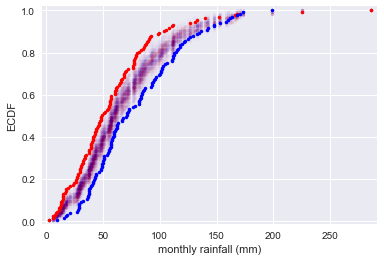

In [14]:
for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_july, rain_november)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_july)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

a permutation replicate is a single value of a statistic computed from a permutation sample. As the draw_bs_reps() function you wrote in chapter 2 is useful for you to generate bootstrap replicates, it is useful to have a similar function, draw_perm_reps(), to generate permutation replicates. 

In [15]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

### P_value

#### The vote for the Civil Rights Act in 1964
The Civil Rights Act of 1964 was one of the most important pieces of legislation ever passed in the USA. Excluding "present" and "abstain" votes, 153 House Democrats and 136 Republicans voted yay. However, 91 Democrats and 35 Republicans voted nay. Did party affiliation make a difference in the vote?

To answer this question, you will evaluate the hypothesis that the party of a House member has no bearing on his or her vote. You will use the fraction of Democrats voting in favor as your test statistic and evaluate the probability of observing a fraction of Democrats voting in favor at least as small as the observed fraction of 153/244. (That's right, at least as small as. In 1964, it was the Democrats who were less progressive on civil rights issues.) To do this, permute the party labels of the House voters and then arbitrarily divide them into "Democrats" and "Republicans" and compute the fraction of Democrats voting yay.

This small p-value suggests that party identity had a lot to do with the voting.

In [16]:
# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

def frac_yay_dems(dems, reps):
    """Compute fraction of Democrat yay votes."""
    frac = np.sum(dems) / len(dems)
    return frac

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yay_dems, 10000)

# Compute and print p-value: p
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0002


### Hypothesis test on Pearson correlation
The observed correlation between female illiteracy and fertility may just be by chance; the fertility of a given country may actually be totally independent of its illiteracy. You will test this hypothesis. To do so, permute the illiteracy values but leave the fertility values fixed. This simulates the hypothesis that they are totally independent of each other. For each permutation, compute the Pearson correlation coefficient and assess how many of your permutation replicates have a Pearson correlation coefficient greater than the observed one.

The function pearson_r() that you wrote in the prequel to this course for computing the Pearson correlation coefficient is already in your name space.

In [21]:
# Compute observed correlation: r_obs
r_obs = np.corrcoef(illiteracy, fertility)[0,1]

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = np.corrcoef(illiteracy_permuted, fertility)[0,1]

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0


You got a p-value of zero. In hacker statistics, this means that your p-value is very low, since you never got a single replicate in the 10,000 you took that had a Pearson correlation greater than the observed one. You could try increasing the number of replicates you take to continue to move the upper bound on your p-value lower and lower.

#### Finch Beaks case